<a href="https://colab.research.google.com/github/isaashka/NLPMedicalAnalyzer/blob/main/NLPMedicalAnalyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Analyzer

# Imports

In [2]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
# General imports
import os
import numpy as np
import nltk
import pandas as pd
from nltk.probability import FreqDist
from nltk import word_tokenize
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /Users/sasha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/sasha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [70]:
# Model specific imports
from decimal import Decimal
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score
from nltk.util import ngrams
import math

from sklearn.naive_bayes import MultinomialNB

import matplotlib.pyplot as plt

In [5]:
# unused
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Data Preprocessing
### Convert: user input --> symptoms

In [7]:
# load the dataset
symptoms_dataset = pd.read_csv("Dataset/dis_sym_dataset_comb.csv")

# extract features to use as a symptom array
X = symptoms_dataset.iloc[:, 1:]
dataset_symptoms = list(X.columns)
# dataset_symptoms

In [8]:
# Tokenizer class
class Tokenizer:
  def __init__(self, lowercase=False):
    self.lowercase = lowercase  # If this is True, convert text to lowercase while tokenizing.
    self.vocab = []

  def tokenize(self, string):
    tokens = word_tokenize(string)
    self.vocab += [w for w in set(tokens) if w not in self.vocab]

    return tokens

In [9]:
def find_symptom_phrases(tokens, symptom_keywords, body_parts, n=2):
    symptom_phrases = []
    ngrams_list = list(ngrams(tokens, n))

    for ngram in ngrams_list:
        for keyword in symptom_keywords:
            for body_part in body_parts:
                if keyword in ngram and body_part in ngram:
                    symptom_phrases.append(' '.join(ngram))

    return symptom_phrases

# Lemmatize input
def lemmatize_tokens(tokens):
    lemmatizer = nltk.WordNetLemmatizer()
    lemmatized_tokens = []  
    for token in tokens:
        lemmatized_tokens.append(lemmatizer.lemmatize(token))
    return lemmatized_tokens

def tokenize_user_symptoms():
    print("Enter symptoms: ")
    
    symptoms = input()
    # tokenize input
    symptom_tokens = word_tokenize(symptoms)

    # lemmatize input
    symptom_tokens_lemmatized = lemmatize_tokens(symptom_tokens)

    # find symptom phrases using n-grams
    symptom_phrases = find_symptom_phrases(symptom_tokens_lemmatized, \
                                           dataset_symptoms, dataset_symptoms) # dataset_symptoms = symptoms retrieved from the dataset
    
    return symptom_phrases

### Ngram approach

Test input: I have been having migraines and headaches. I can't sleep. My whole body is shaking and shivering. I feel dizzy sometimes

In [11]:
extracted_symptoms = tokenize_user_symptoms()
print()
print('Here\'s your list of symptoms: ')
print(extracted_symptoms)

Enter symptoms: 


 I have been having migraines and headaches. I can't sleep. My whole body is shaking and shivering. I feel dizzy sometimes



Here's your list of symptoms: 
['and headache', 'headache .', 'is shaking', 'shaking and', 'and shivering', 'shivering .']


### NER / BERT approach --- WIP

In [30]:
!pip install transformers torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 764.4 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 25.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.7/401.7 kB 8.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.8/415.8 kB 8.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 15.4 MB/s eta 0:00:0000:0100:01


In [31]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

# Load the pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

# Initialize the pipeline
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

# Example text
texts = [
    "I love this product!",
    "This is the worst service ever."
]

# Perform sentiment analysis
results = classifier(texts)

# Print results
for text, result in zip(texts, results):
    print(f"Text: {text}\nLabel: {result['label']}, Score: {result['score']:.4f}\n")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Text: I love this product!
Label: LABEL_1, Score: 0.6382

Text: This is the worst service ever.
Label: LABEL_1, Score: 0.6356



### ---- WIP

# Models

Classification models used to match an input list of symptoms to the disease.

Following code inspired by this github repo: https://github.com/rahul15197/Disease-Detection-based-on-Symptoms?source=post_page-----54e6be60a3d1--------------------------------

We used the dataset from the github repo as well as some general structure of code. Most of the code was written by us to suit our overall structure.


In [14]:
# lists used for performance plots

model_list = []
f1_scores = []
accuracies = []

### Dataset

In [15]:
# load the dataset
symptoms_dataset = pd.read_csv("Dataset/dis_sym_dataset_comb.csv")

# separate the features and labels
X = symptoms_dataset.iloc[:, 1:]
Y = symptoms_dataset.iloc[:, 0:1]

# convert Y (labels) to a 1D array 
y_array = Y.to_numpy() if isinstance(Y, pd.Series) else Y.values
Y = y_array.ravel()

In [16]:
# split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.10)     

### Evaluate the Model

In [17]:
# fit model according to its type and make predictions
def fit_and_predict(classifier, model_type):
    classifier = classifier.fit(X, Y)

    # Predict on the test set
    y_pred = classifier.predict(x_test)
    
    precision, recall, f1, accuracy = evaluate_model(y_test, y_pred, model_type)
    print_evaluation_metrics(precision, recall, f1, accuracy)

# Evaluate the model on different metrics
def evaluate_model(y_test, y_pred, model_type):
    # Calculate precision, recall, and F1-score for each class and then compute the macro average
    precision = round(Decimal(precision_score(y_test, y_pred, average='macro', zero_division=1) * 100), 2)
    recall= round(Decimal(recall_score(y_test, y_pred, average='macro', zero_division=1) * 100), 2)
    f1= round(Decimal(f1_score(y_test, y_pred, average='macro') * 100), 2)
    
    # calculate accuracy
    accuracy = round(Decimal(accuracy_score(y_test, y_pred) * 100), 2)
    
    # Add metrics to overall arrays used later for graphing
    model_list.append(model_type)
    f1_scores.append(f1)
    accuracies.append(accuracy)

    return precision, recall, f1, accuracy
    
def print_evaluation_metrics(precision, recall, f1, accuracy):
    print(f'Macro-average Precision: {precision}%')
    print(f'Macro-average Recall: {recall}%')
    print(f'Macro-average F1-score: {f1}%')
    print(f'Accuracy: {accuracy}%')


In [18]:
# prints all model names and their f1 score and accuracy
def print_all_metrics():
    for i in range(len(model_list)):
        print(f'Model: {model_list[i]}, f1 = {f1_scores[i]} accuracy = {accuracies[i]}')
        # print(model_list[i], f1_scores[i], accuracies[i])

### Multinomial Naive Bayes

In [19]:
# Train the Naive Bayes classifier
mnb = MultinomialNB()
fit_and_predict(mnb, 'MultinomialNaiveBayes')

Macro-average Precision: 93.56%
Macro-average Recall: 50.87%
Macro-average F1-score: 50.66%
Accuracy: 83.37%


### Support Vector Machine

In [20]:
# Train the Support Vector Machine classifier
svm = SVC()
fit_and_predict(svm, 'SupportVectorMachine')

Macro-average Precision: 93.62%
Macro-average Recall: 72.34%
Macro-average F1-score: 71.61%
Accuracy: 89.82%


### Logistic Regression

In [21]:
# Train the Support Vector Machine classifier
lr = LogisticRegression()
fit_and_predict(lr, 'LogisticRegression')

Macro-average Precision: 93.39%
Macro-average Recall: 74.77%
Macro-average F1-score: 73.40%
Accuracy: 90.16%


In [22]:
print_all_metrics()

Model: MultinomialNaiveBayes, f1 = 50.66 accuracy = 83.37
Model: SupportVectorMachine, f1 = 71.61 accuracy = 89.82
Model: LogisticRegression, f1 = 73.40 accuracy = 90.16


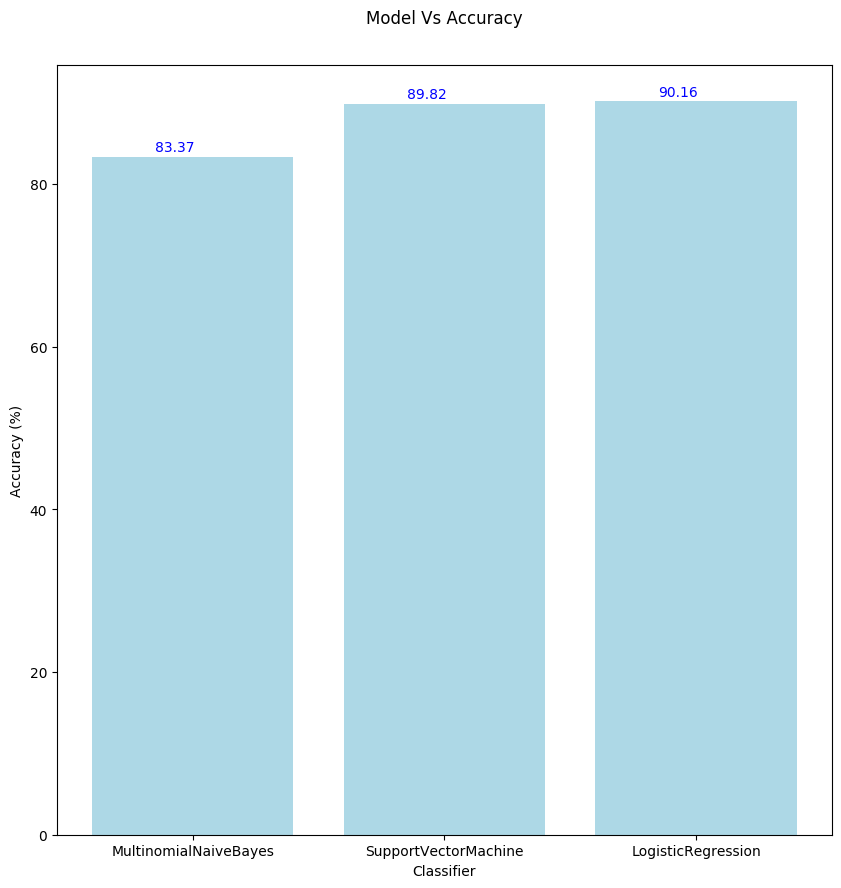

In [23]:
# Metric lists for reference
# model_list = []
# f1_scores = []
# accuracies = []

# Comparison plot for all classifiers with their accuracy
plt.style.use('_classic_test_patch')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
plt.title("Model Vs Accuracy", color='black', pad=30)
plt.xlabel('Classifier', color='black')
plt.ylabel('Accuracy (%)', color='black')
plt.bar(model_list, accuracies, color='lightblue')
for i, j in enumerate(accuracies):
    ax.text(float(i)-0.15, float(j)+0.7, str(j), color='blue')
plt.show()

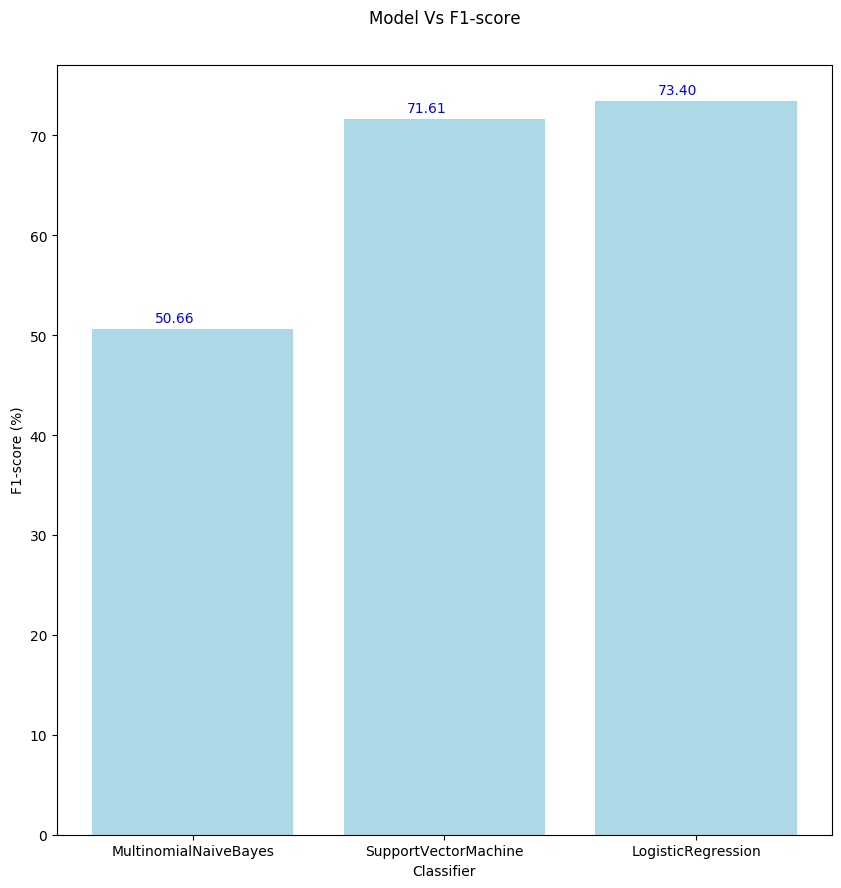

In [24]:
# comparison plot for all classifiers with their F1-score
plt.style.use('_classic_test_patch')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
plt.title("Model Vs F1-score", color='black', pad=30)
plt.xlabel('Classifier', color='black')
plt.ylabel('F1-score (%)', color='black')
plt.bar(model_list, f1_scores, color='lightblue')
for i, j in enumerate(f1_scores):
    ax.text(float(i)-0.15, float(j)+0.7, str(j), color='blue')
plt.show()

# Disease Output

### Logistic Regression Model

The best performing model was Logistic Regression, so we'll use that in our evaluations of user input.

This code almost completely adapted from: https://github.com/rahul15197/Disease-Detection-based-on-Symptoms/blob/master/SymptomSuggestion.ipynb


In [58]:
# load the dataset
df_comb = pd.read_csv("Dataset/dis_sym_dataset_comb.csv")
df_norm = pd.read_csv("Dataset/dis_sym_dataset_norm.csv")

# separate the features and labels
X = df_comb.iloc[:, 1:]
Y = df_comb.iloc[:, 0:1]

# convert Y (labels) to a 1D array 
y_array = Y.to_numpy() if isinstance(Y, pd.Series) else Y.values
Y = y_array.ravel()

In [59]:
lr = LogisticRegression()
lr = lr.fit(X, Y)
scores = cross_val_score(lr, X, Y, cv=5)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [60]:
X = df_norm.iloc[:, 1:]
Y = df_norm.iloc[:, 0:1]

In [61]:
# List of symptoms
dataset_symptoms = list(X.columns)

### Input Symptoms --> Disease

This is where we use the model to tell us what diseases the user may have based on the symptoms extracted from their input.

In [63]:
# Create vector from processed user symptoms to be used by the model

# example symptom list
sym_list = ["yellowish skin","wheezing","abdominal cramp","back","feeling cold"]

sym_vector = [0 for i in range(0, len(dataset_symptoms))]
for sym in sym_list:
    print(sym)
    sym_vector[dataset_symptoms.index(sym)] = 1

yellowish skin
wheezing
abdominal cramp
back
feeling cold


In [64]:
disease_predict = lr.predict_proba([sym_vector])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [67]:
k = 10
diseases = list(set(Y['label_dis']))
diseases.sort()
top_k = disease_predict[0].argsort()[-k:][::-1]

In [75]:

print(f"\nTop {k} diseases predicted based on symptoms")
topk_dict = {}
# Show top 10 highly probable disease to the user.
for idx,t in  enumerate(top_k):
    match_sym=set()
    row = df_norm.loc[df_norm['label_dis'] == diseases[t]].values.tolist()
    row[0].pop(0)

    for idx,val in enumerate(row[0]):
        if val!=0:
            match_sym.add(dataset_symptoms[idx])
    prob = (len(match_sym.intersection(set(sym_list)))+1)/(len(set(sym_list))+1)
    prob *= np.mean(scores)
    topk_dict[t] = prob
j = 0
topk_index_mapping = {}
topk_sorted = dict(sorted(topk_dict.items(), key=lambda kv: kv[1], reverse=True))
for key in topk_sorted:
  prob = topk_sorted[key]*100
  print(str(j+1) + " Disease name:",diseases[key], "\tProbability:",str(round(prob, 2))+"%")
  topk_index_mapping[j] = key
  j += 1



Top 10 diseases predicted based on symptoms
1 Disease name: Myocardial Infarction (Heart Attack) 	Probability: 29.73%
2 Disease name: Food Poisoning 	Probability: 29.73%
3 Disease name: Thalassaemia 	Probability: 29.73%
4 Disease name: Asbestos-related diseases 	Probability: 29.73%
5 Disease name: Bronchitis 	Probability: 29.73%
6 Disease name: Frost Bite 	Probability: 29.73%
7 Disease name: Hepatitis B 	Probability: 29.73%
8 Disease name: Hepatitis 	Probability: 29.73%
9 Disease name: Ques fever 	Probability: 29.73%
10 Disease name: Polycystic ovary syndrome (PCOS) 	Probability: 14.87%
